삽입된 사진은 신윤수 강사님(ys@betweak.com)의 강의 자료를 기반으로 합니다.

# 웹 통신

 통신이란 송신자가 수신자에게 어떤 수단을 통해 메시지를 전달하는 것을 의미한다. 특히, **웹 통신**은 다음과 같이 웹을 통해 메시지를 전달하는것을 의미한다.

![web-structure](./images/web_01.png)

 웹 통신은 **요청**과 **응답**으로 이루어진다. 그 중에서도, 응답이 *있는* 통신과, *없는* 통신으로 나눌 수 있다.
 
![web-structure](./images/web_04.png)

> *참고*
> 
> 예전에 Youtube와 같은 동영상 스트리밍 사이트는 대부분 UDP에 속했는데, 요즈음에는 TCP와 UDP를 섞어서 사용한다.

 ICMP 통신규약에서는 `ping` 요청을 통해 **어떠한 인터넷 URL이 있고, 그 주소가 요청을 받아들일 수 있는지** 확인한다. 쉽게 말하면, 인터넷 URL에 *"너 있니?"* 하고 물어보는 것이다.

![web-ping](./images/web_02.png)

 cmd 창에 `ping` 요청을 보내면, 서버가 접근할 수 있는 IP 주소를 바꿔서 응답해 준다. 혹 접근할 수 없는 경우라면, 오류가 뜬다. 당연히, 요청에 대한 응답 순서가 바뀔 수도 있다.

### 웹 : Server & Client 구조

 웹 통신의 구조를 요약하면 다음과 같다.

![web-server-and-client](./images/web_05.png)


> *참고*
> 
> Server의 클라이언트는 브라우저이고, 브라우저의 클라이언트는 사용자가 된다.

### URL

 웹 통신을 이해하기 위해서는 URL의 구조를 파악해야 한다. URL은 도메인과 경로, 매개변수(parameters)로 이루어져 있다.

* 예 : https://search.naver.com/search.naver?where=news&query=무역전쟁
    - https://search.naver.com : 도메인
    - /search.naver : 경로
    - ?where=news&query=무역전쟁 : 매개변수

![web-url](./images/web_06.png)

### 데이터 포맷

 통신에서 구조화된 데이터를 전송하는 방식으로는 XML과 JSON의 두 가지가 있다.

1. XML

```
<menus>
<menu id=‘1’ is_soldout=‘false’>
    <name>양지 쌀국수</name>
    <category>면류</category>
    <price>8000</price>
    <calories>800kcal</calories>
</menu>

<menu id=‘2’ is_soldout=‘true’>
    <name>소고기 비빔밥</name>
    <category>밥류</category>
    <price>9000</price>
    <calories>1200kcal</calories>
</menu>
```

 여는 태그, 닫는 태그로 이루어져 있다. HTML도 XML의 일종이다.

2. JSON

```
{
  'menus': [
    { 'id':1,
      'name': '양지 쌀국수',
      'category': '면류',
      'price': 8000,
      'calories': '800kcal',
      'is_soldout': false 
    },
    { 'id':2, 
      ‘name': '소고기 비빔밥',
      'category': '밥류',
      'price': 9000,
      'calories': '1200 kcal',
      'is_soldout': true
    }
  ]}
```

 파이썬 dictionary 형태와 비슷하다. 파이썬에는 내장 라이브러리가 있어 JSON을 load하고 dict 형태로 바꿔줄 수 있다.

**두 데이터 포맷의 차이**

![web-data-format](./images/web_07.png)

 xml의 경우 데이터 길이가 크지만, 속성을 적용할 수 있다. json의 경우 반대.

### HTML 태그의 종류
* `div` : 구역을 나누는 용도.
* `ul`/ `ol` (> `li`) : list. 순서가 없는(`ul`), 순서가 있는(`ol`) 리스트. 해당 태그 안에 거의 `li` 태그가 있다.
* `a` (> `href`) : `a` 태그는 클릭이 가능. `href`라는 hyper reference 속성과 같이 쓰인다.
* `img` (> `src`) : `img` 태그는 이미지를 나타낸다. 이미지도 결국 request를 보내서 그 응답으로 이미지를 가져 온다. 실제 이미지 파일을 나타내는 경로가 `src`에 저장되어 있다. `src` 속성에 접근해서 다운받으면 된다.

### Requests의 메소드(HTTP 메소드)
* GET : 가져오기.
* POST : 붙이기, 등록하기.
* PUT : 수정하기.
* DELETE : 삭제하기.

### Response의 응답코드(HTTP 상태코드)
* 2xx : 성공. 
* 3xx : 리디렉션(자원이 옮겨진 경우).
* 4xx : 요청 오류(사용자 잘못).
* 5xx : 서버 오류(서버 잘못).

# 웹 스크레이핑

 웹 스크레이핑이란 웹 통신을 통해 정보를 자동으로 수집하고 정리하는 것을 말한다. 반복적인 작업을 자동화할 수 있다.
 

### 용도

 검색 엔진, 메타데이터 사이트, 경쟁사 신상품 알림, 최저가 검색, SNS 태그 검색...
 
### 결국,

 웹 서버에 요청을 보낸 후, 응답을 분석하여 내가 원하는 방식으로 사용하는 것을 의미한다.

## Requests 라이브러리

In [1]:
# module import
import requests

요청을 보내고 응답을 받는다.
- `requests.request([요청 메소드], [URL])`
- `requests.[요청 메소드]([URL])` : 내부적으로 위의 함수 호출.
    - `requests.get`
    - `requests.put`
    - `requests.post`
    - `requests.delete`

In [4]:
# 요청을 보내고, 응답을 받는다.
resp = requests.request('GET', 'https://naver.com')
resp # 응답 코드 : 성공.

<Response [200]>

In [5]:
# 또 다른 방식.
resp_2 = requests.get('https://naver.com')
resp_2

<Response [200]>

* 응답으로 HTML 문서가 온다. 페이지 검사를 통해 해당 페이지의 HTML 문서를 확인할 수 있다.

![web-page-source](./images/web_03.png)

* 응답에 대한 함수
    - `response.text`
    - `response.headers` : 쿠키, 데이터 형식 등을 알 수 있음.
    - `response.status_code` : 응답 상태 코드.
    - `response.encoding` : 인코딩
    - `response.url` : 요청 url
    - `response.json` : 요청에 대한 응답이 json 포맷이면 바로 json 객체로 만듦.

'\n<!doctype html>             <html lang="ko"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/
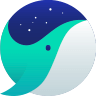
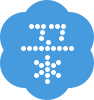

In [6]:
# 응답으로 온 HTML 페이지를 텍스트로 본다.

resp.text

In [7]:
# 헤더 부분을 확인한다.
resp.headers

{'Server': 'NWS', 'Date': 'Mon, 01 Jun 2020 05:34:47 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': 'PM_CK_loc=2ee1ca04da8f721bca770cd9ba1ac7bba09068b9a6107554a9cb1ac391cd0995; Expires=Tue, 02 Jun 2020 05:34:47 GMT; Path=/; HttpOnly', 'Cache-Control': 'no-cache, no-store, must-revalidate', 'Pragma': 'no-cache', 'P3P': 'CP="CAO DSP CURa ADMa TAIa PSAa OUR LAW STP PHY ONL UNI PUR FIN COM NAV INT DEM STA PRE"', 'X-Frame-Options': 'DENY', 'X-XSS-Protection': '1; mode=block', 'Content-Encoding': 'gzip', 'Strict-Transport-Security': 'max-age=63072000; includeSubdomains', 'Referrer-Policy': 'unsafe-url'}

## BeautifulSoup 라이브러리

 HTML이나 XML을 파싱하는 파서 라이브러리. 요청에 대한 응답을 분석하고 저장할 때 사용한다. 파서를 사용해 `BeautifulSoup` 객체를 만든다. 파서로는 `lxml`, `html.parser`, `html5lib` 등이 있다.


In [8]:
# module import
from bs4 import BeautifulSoup

In [9]:
# beautifulsoup 객체 생성
soup = BeautifulSoup(resp.text)
type(soup)  # 파이썬 객체

bs4.BeautifulSoup

다음과 같이 확인할 수 있다. 예쁘게 보려면, `.prettify()` 메소드를 사용한다.

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta charset="utf-8"/>
  <title>
   NAVER
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=1190" name="viewport"/>
  <meta content="NAVER" name="apple-mobile-web-app-title">
   <meta content="index,nofollow" name="robots">
    <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
     <meta content="네이버" property="og:title"/>
     <meta content="https://www.naver.com/" property="og:url"/>
     <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
     <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
      <meta content="summary" name="twitter:card"/>
      <meta content="" name="twitter:title"/>
      <meta content="https://www.naver.com/" name="twitter:url"/>
      <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/>
      <meta cont
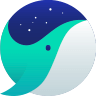
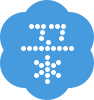

In [16]:
print(soup.prettify())

In [17]:
# 첫 번째 태그에 접근할 수 있다.
soup.title

<title>NAVER</title>

In [18]:
soup.span

<span>뉴스스탠드 바로가기</span>

### 원하는 정보에 접근

 페이지 검사를 통해 각 태그를 활용해 요소에 접근할 수 있다.

- `soup.find()`
- `soup.find_all()`

> *참고* : class, id 이름에 공백 들어 있는 걸 포함하면 다른 클래스가 된다. 공백은 없는 걸로 본다.

In [24]:
# 메뉴를 가져와 보자(메일~웹툰)
items = soup.find_all('li', {'class' : 'nav_item'})
naver_tabs = [item.get_text() for item in items]
print(*naver_tabs)

메일 카페 블로그 지식iN 쇼핑 Pay TV 사전 뉴스 증권 부동산 지도 영화 뮤직 책 웹툰


In [31]:
# 메뉴와 링크를 같이 가져와 보자.
from pprint import pprint

items = soup.find_all('li', {'class' : 'nav_item'})
naver_menus = {item.get_text():item.find('a').get('href') for item in items} # item.find('a')['href']
pprint(naver_menus)

{'Pay': 'https://order.pay.naver.com/home',
 'TV': 'https://tv.naver.com/',
 '뉴스': 'https://news.naver.com/',
 '메일': 'https://mail.naver.com/',
 '뮤직': 'https://vibe.naver.com/?from=naver_main',
 '부동산': 'https://land.naver.com/',
 '블로그': 'https://section.blog.naver.com/',
 '사전': 'https://dict.naver.com/',
 '쇼핑': 'https://shopping.naver.com/',
 '영화': 'https://movie.naver.com/',
 '웹툰': 'https://comic.naver.com/',
 '증권': 'https://finance.naver.com/',
 '지도': 'https://map.naver.com/',
 '지식iN': 'https://kin.naver.com/',
 '책': 'https://book.naver.com/',
 '카페': 'https://section.cafe.naver.com/'}


### 상대적 경로로 접근
* 부모 태그
* 형제 태그
* 자식 태그

### CSS 태그로 선택

* `soup.select()`

    - `.` : class
    - `#` : id
    - ` ` : 계층구조. 한 칸 띄운다.
    - `>` : 계층 구조 중에서도 바로 자기 자식 태그일 경우.

In [34]:
# id로 선택
soup.select('div#NM_FAVORITE') # 여기서부터 출발
soup.select('div#NM_FAVORITE li.nav_item') # 자식 태그 접근 : class가 nav_item인 li
soup.select('div#NM_FAVORITE li.nav_item>a') # 바로 밑에 있는 a 태그

[<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>,
 <a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a>,
 <a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a>,
 <a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a>,
 <a class="nav" data-clk="svc.shopping" href="https://shopping.naver.com/">쇼핑</a>,
 <a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a>,
 <a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>,
 <a class="nav" data-clk="svc.dic" href="https://dict.naver.com/">사전</a>,
 <a class="nav" data-clk="svc.news" href="https://news.naver.com/">뉴스</a>,
 <a class="nav" data-clk="svc.stock" href="https://finance.naver.com/">증권</a>,
 <a class="nav" data-clk="svc.land" href="https://land.naver.com/">부동산</a>,
 <a class="nav" data-clk="svc.map" href="https://map.naver.com/">지도</a>,
 <a class="nav" da

* 속성을 보려면 `attrs`

In [5]:
# 속성 확인
url = 'https://search.naver.com/search.naver?where=news&query=kia'
resp = requests.get(url)
soup = BeautifulSoup(resp.text)
news_wrap = soup.find('ul', class_ = 'type01')
news_list_items = news_wrap.find_all('li', recursive=False)
for news in news_list_items:
    anchor_tag = news.find('a', class_ = '_sp_each_title')
anchor_tag.attrs

{'href': 'http://www.newsis.com/view/?id=NISI20200531_0016364430',
 'target': '_blank',
 'class': ['_sp_each_title'],
 'onclick': "return goOtherCR(this, 'a=nws*e.tit&r=18&i=88000127_000000000000000009890062&g=003.0009890062&u='+urlencode(this.href));",
 'title': '패배 KIA 타이거즈'}